In [6]:
import matplotlib.pyplot as plt
import numpy as np
import docs.source.filters as filters

Reading file

In [7]:
file_path = 'docs/4_4_5M_TF.txt'

frequencies = []
dB_values = []

with open(file_path, 'r') as file:
    for line in file:
        # Skip comment lines
        if line.startswith(';'):
            continue
        # Split the line by comma and convert to float
        try:
            freq, dB = map(float, line.split(','))
            frequencies.append(freq)
            dB_values.append(dB)
        except ValueError:
            # In case of a malformed line, print a message and skip
            print(f"Skipping malformed line: {line.strip()}")
            
# Convert lists to numpy arrays
frequencies = np.array(frequencies, dtype=float)
dB_values = np.array(dB_values, dtype=float)


Generating Filter Model

In [8]:
# #Variables
Ch = 20e-12
Cr = 75e-15
fs = 9.6e9

H_44, omega, Zo, fc = filters.DFTF('BPF44', Ch, Cr, fs)

# Convert normalized frequencies (omega) to Hz
frequencies_1 = omega * fs / (2 * np.pi)

# Define the frequency range for plotting 
freq_range_min = -50e6
freq_range_max = 50e6  

# Apply the frequency range filter
mask_1 = (frequencies_1 >= freq_range_min) & (frequencies_1 <= freq_range_max)

4/4 BPF Ch = 2e-11 Cr = 7.5e-14 Fs = 9600000000.0
Zo =  1388.888888888889
Fc =  5.729551094138192  MHz
arctan(Cr / Ch) =  0.0037499824220233137
fs / (2 * np.pi) =  1527887453.6821952


Comparing

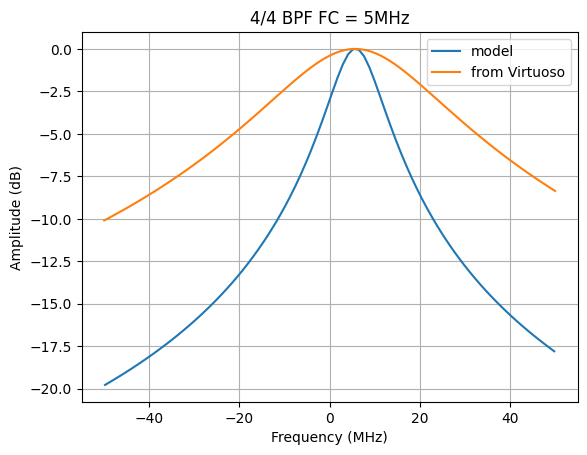

In [9]:
# Plot magnitude response
plt.figure(1)
plt.plot(frequencies_1[mask_1]/1e6, 20 * np.log10(np.abs(H_44[mask_1])), label='model')

plt.plot(frequencies/1e6, dB_values - max(dB_values), label='from Virtuoso')
plt.title('4/4 BPF FC = 5MHz')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.legend()
plt.show()

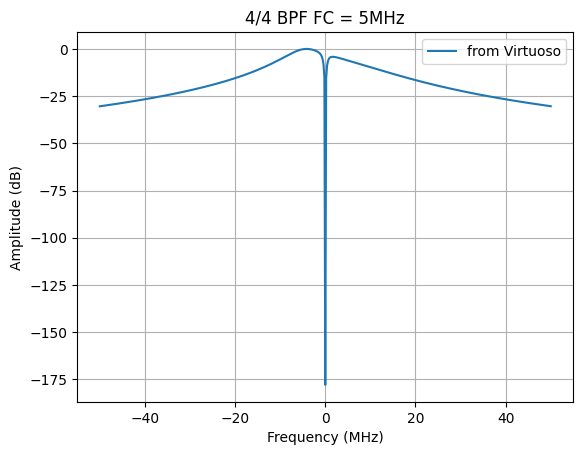

In [10]:
file_path = 'docs/4_8_5M_TF.txt'

frequencies = []
dB_values = []

with open(file_path, 'r') as file:
    for line in file:
        # Skip comment lines
        if line.startswith(';'):
            continue
        # Split the line by comma and convert to float
        try:
            freq, dB = map(float, line.split(','))
            frequencies.append(freq)
            dB_values.append(dB)
        except ValueError:
            # In case of a malformed line, print a message and skip
            print(f"Skipping malformed line: {line.strip()}")
            
# Convert lists to numpy arrays
frequencies = np.array(frequencies, dtype=float)
dB_values = np.array(dB_values, dtype=float)

# Plot magnitude response
plt.figure(1)

plt.plot(frequencies/1e6, dB_values - max(dB_values), label='from Virtuoso')
plt.title('4/8 BPF FC = 5MHz')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.legend()
plt.show()


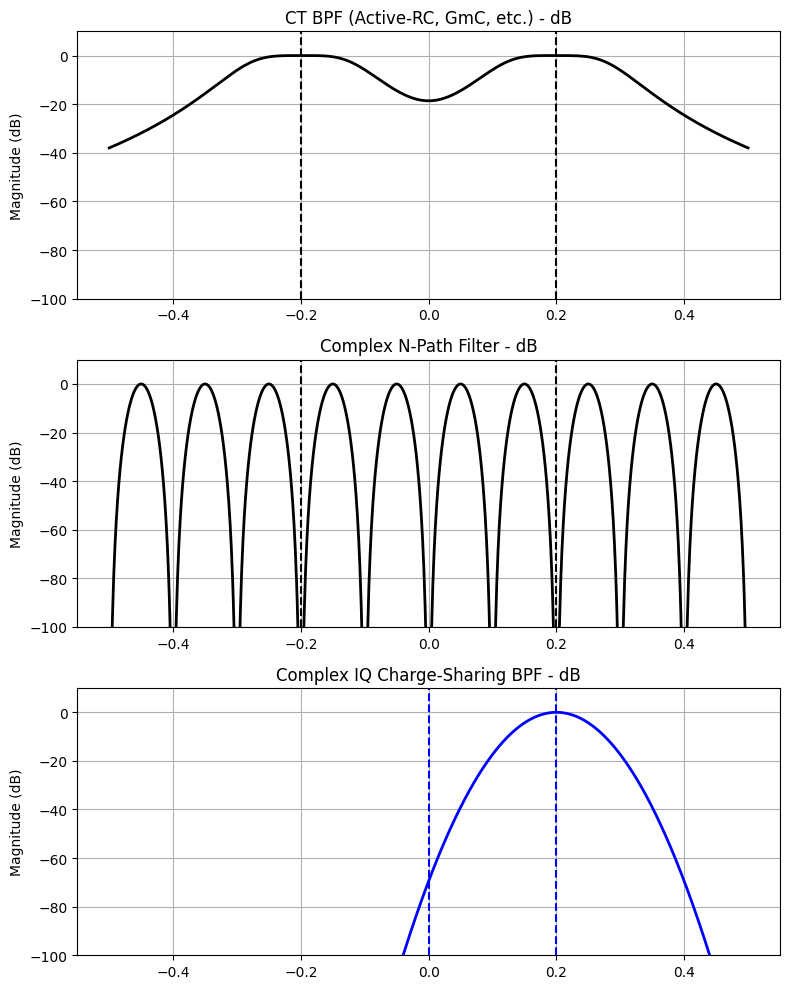

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Frequências de amostragem e intermediária (ajustáveis)
fs = 1
f_IF = 0.2 * fs

# Frequências para os gráficos
f = np.linspace(-fs/2, fs/2, 1000)

# Função de transferência do filtro ativo
def ct_bpf(f, f_IF):
    return 1 / (1 + ((f - f_IF) / 0.1)**4) + 1 / (1 + ((f + f_IF) / 0.1)**4)

# Função de transferência do filtro N-path com múltiplos picos
def n_path_filter(f, f_IF):
    return np.abs(np.sin(2 * np.pi * f / f_IF))**6

# Função de transferência do filtro IQ charge-sharing, com pico central suavizado
def iq_charge_sharing(f, f_IF):
    return np.exp(-(f - f_IF)**2 / (2 * (0.25 * f_IF)**2))

# Converter as respostas para dB (usando uma magnitude mínima para evitar log de 0)
def to_db(magnitude):
    return 20 * np.log10(np.maximum(magnitude, 1e-12))

# Criar a figura
plt.figure(figsize=(8, 10))

# Gráfico 1: Filtro Ativo em dB
plt.subplot(3, 1, 1)
plt.plot(f, to_db(ct_bpf(f, f_IF)), 'k', linewidth=2)
plt.title('CT BPF (Active-RC, GmC, etc.) - dB')
plt.axvline(f_IF, color='k', linestyle='--')
plt.axvline(-f_IF, color='k', linestyle='--')
plt.ylabel('Magnitude (dB)')
plt.ylim([-100, 10])  # Limitar para refletir o comportamento em dB
plt.grid(True)

# Gráfico 2: Complex N-Path Filter em dB
plt.subplot(3, 1, 2)
plt.plot(f, to_db(n_path_filter(f, f_IF)), 'k', linewidth=2)
plt.title('Complex N-Path Filter - dB')
plt.axvline(f_IF, color='k', linestyle='--')
plt.axvline(-f_IF, color='k', linestyle='--')
plt.ylabel('Magnitude (dB)')
plt.ylim([-100, 10])  # Limite ajustado para mostrar a forma dos picos
plt.grid(True)

# Gráfico 3: Complex IQ Charge-Sharing Filter em dB
plt.subplot(3, 1, 3)
plt.plot(f, to_db(iq_charge_sharing(f, f_IF)), 'b', linewidth=2)
plt.title('Complex IQ Charge-Sharing BPF - dB')
plt.axvline(f_IF, color='b', linestyle='--')
plt.axvline(0, color='b', linestyle='--')
plt.ylabel('Magnitude (dB)')
plt.ylim([-100, 10])  # Limitar para refletir melhor a resposta em dB
plt.grid(True)

# Ajustar layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()
